In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils.signal_generator import mi_funcion_sen

In [20]:
# parametros de cuantización
resolutions = (4, 8, 16)
vf = 2

# parametros de la señal
f = 1  
A = 1
N = 1000
fs = 1000
 

In [21]:
time, signal = mi_funcion_sen(vmax=A, dc=0, ff=f, ph=0, nn=N, fs=fs)

In [22]:
full_range = 2 * vf
full_range

4

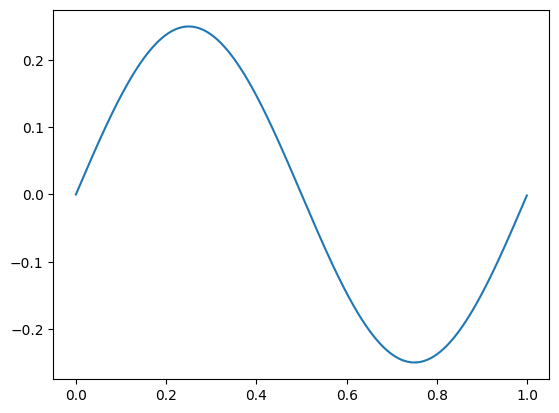

In [23]:
normalized_signal = signal / full_range
plt.plot(time, normalized_signal)

In [24]:
def quantize_signal(vf, b, signal):
    q = (2 * vf) / (2 ** b)
    quantized_signal = np.round((signal + vf) / q) * q - vf
    quantized_signal = np.clip(quantized_signal, -vf, vf)
    return quantized_signal




In [25]:
q_signals = [quantize_signal(vf, b, signal) for b in resolutions]



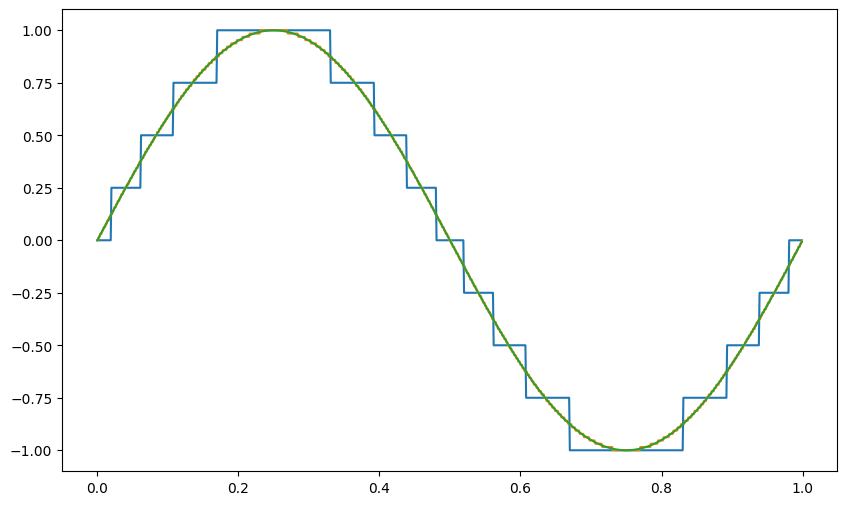

In [26]:
plt.figure(figsize=(10, 6))
for i, q_signal in enumerate(q_signals):
    plt.plot(time, q_signal, label=f'Quantized Signal ({resolutions[i]} bits)')

In [27]:
noise = [signal - q_signal for q_signal in q_signals]

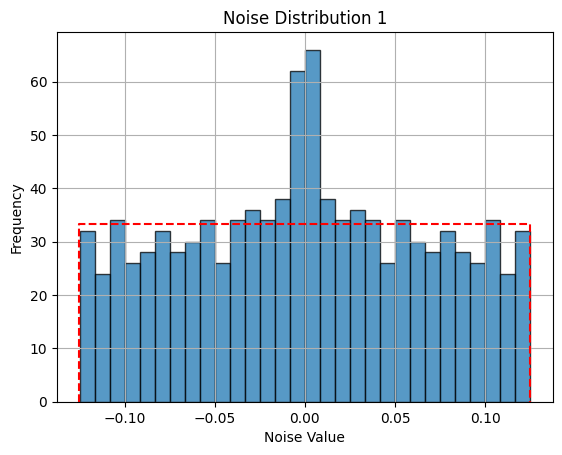

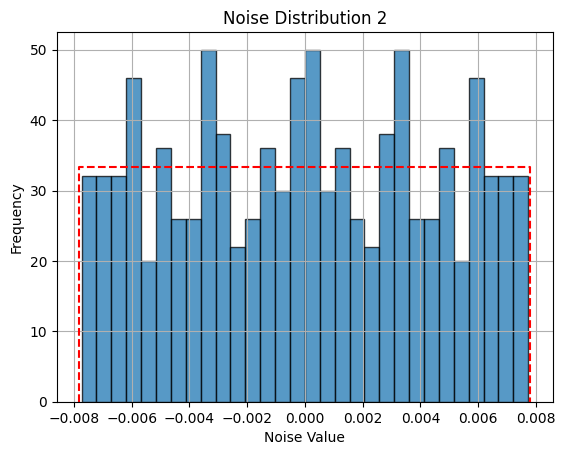

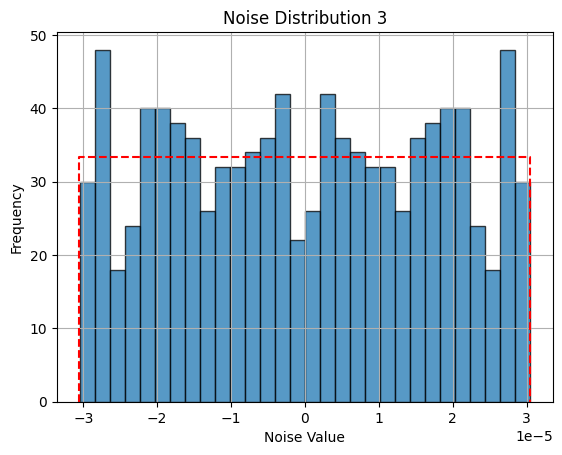

In [34]:

for i, n in enumerate(noise):
    q = (2 * vf) / (2 ** resolutions[i])
    plt.figure()
    plt.hist(n, bins=30, alpha=0.75, edgecolor='black')
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/30, N/30, 0]), '--r' )
    plt.title(f'Noise Distribution {i+1}')
    plt.xlabel('Noise Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()